<a href="https://colab.research.google.com/github/Mauri1206/MindMesh/blob/main/Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arboles de Decision**

En este proyecto de inteligencia artificial, emplearemos una base de datos del naufragio del Titanic para desarrollar un modelo predictivo de supervivencia. Utilizando algoritmos de aprendizaje automático, analizaremos características como género, edad y clase de billete para predecir la probabilidad de sobrevivir al desastre. Al final, podremos ofrecer una experiencia interactiva donde los usuarios podrán ingresar datos y obtener la predicción de supervivencia de un pasajero ficticio del Titanic.

Para Ejecutar todo Ctr+f9

MindMesh

In [ ]:
!git clone "https://github.com/Mauri1206/MindMesh.git"

Cloning into 'MindMesh'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 22.30 KiB | 393.00 KiB/s, done.


In [ ]:
import pandas as pd
datos = pd.read_csv("MindMesh/train.csv")

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

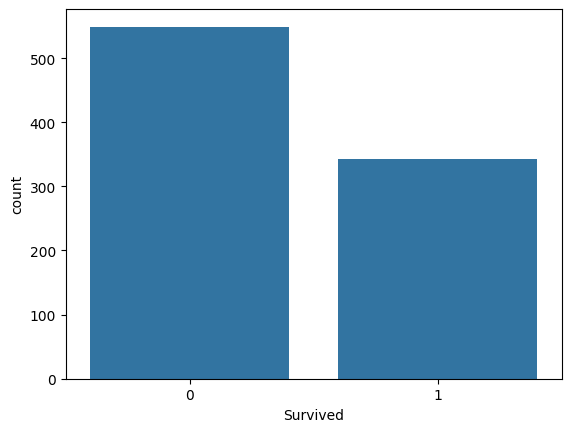

In [ ]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

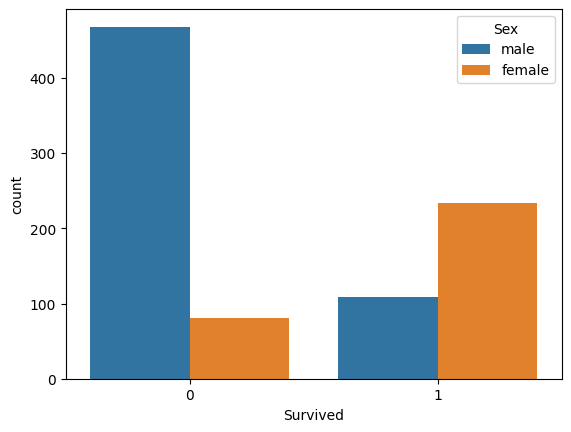

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

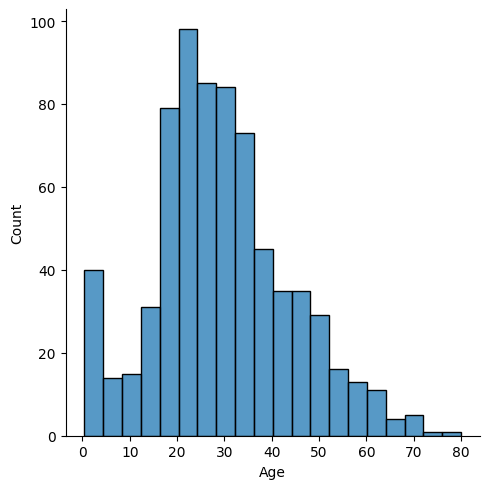

In [ ]:
sb.displot(x="Age", data=datos)

In [ ]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
datos["Age"].mean()

29.69911764705882

In [ ]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [ ]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
datos = datos.drop(["Cabin"], axis=1)

In [ ]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
datos = datos.dropna()

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

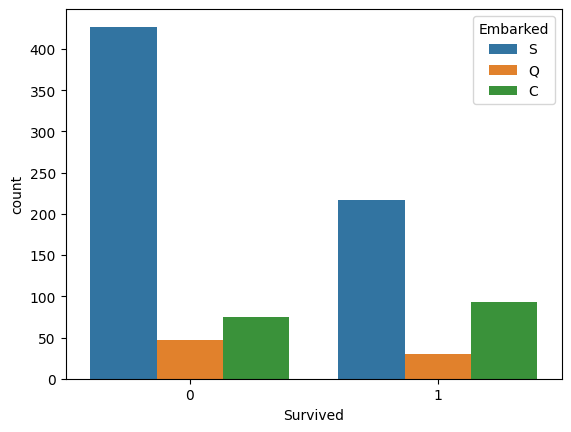

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [ ]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

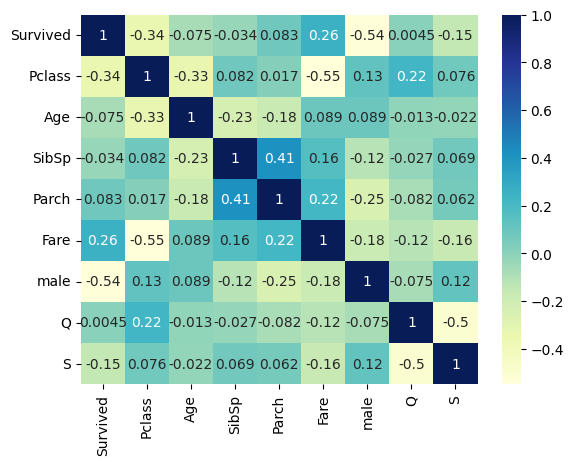

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

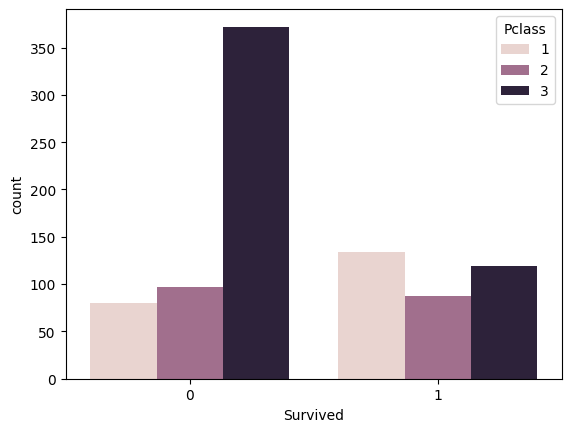

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8033707865168539

In [ ]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.7415730337078652
Resultado para 2: 0.7584269662921348
Resultado para 3: 0.7752808988764045
Resultado para 4: 0.7752808988764045
Resultado para 5: 0.7808988764044944
Resultado para 6: 0.7808988764044944
Resultado para 7: 0.7808988764044944
Resultado para 8: 0.7640449438202247
Resultado para 9: 0.7921348314606742
Resultado para 10: 0.8258426966292135
Resultado para 11: 0.7921348314606742
Resultado para 12: 0.8146067415730337
Resultado para 13: 0.8089887640449438
Resultado para 14: 0.7865168539325843


<Axes: >

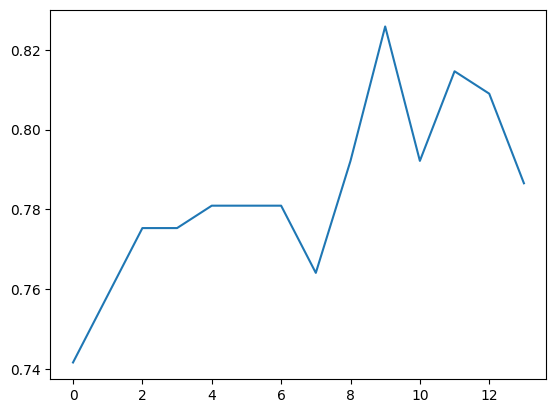

In [ ]:
sb.lineplot(data=resultados)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       108
           1       0.80      0.57      0.67        70

    accuracy                           0.78       178
   macro avg       0.78      0.74      0.75       178
weighted avg       0.78      0.78      0.77       178



In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,98,10
Real: Si,30,40


In [ ]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.43935643564356436, 0.9444444444444444, 'male <= 0.5\n0.471\n711\n[441, 270]\nMurió'),
 Text(0.26485148514851486, 0.8333333333333334, 'Pclass <= 2.5\n0.386\n264\n[69, 195]\nVivió'),
 Text(0.1485148514851485, 0.7222222222222222, 'Fare <= 28.856\n0.106\n142\n[8, 134]\nVivió'),
 Text(0.12211221122112212, 0.6111111111111112, 'Fare <= 28.231\n0.203\n61\n[7, 54]\nVivió'),
 Text(0.10891089108910891, 0.5, 'Age <= 56.0\n0.18\n60\n[6, 54]\nVivió'),
 Text(0.07260726072607261, 0.3888888888888889, 'SibSp <= 0.5\n0.158\n58\n[5, 53]\nVivió'),
 Text(0.039603960396039604, 0.2777777777777778, 'Fare <= 13.25\n0.097\n39\n[2, 37]\nVivió'),
 Text(0.026402640264026403, 0.16666666666666666, 'Age <= 25.5\n0.172\n21\n[2, 19]\nVivió'),
 Text(0.013201320132013201, 0.05555555555555555, '0.375\n4\n[1, 3]\nVivió'),
 Text(0.039603960396039604, 0.05555555555555555, '0.111\n17\n[1, 16]\nVivió'),
 Text(0.052805280528052806, 0.16666666666666666, '0.0\n18\n[0, 18]\nVivió'),
 Text(0.10561056105610561, 0.277777777777

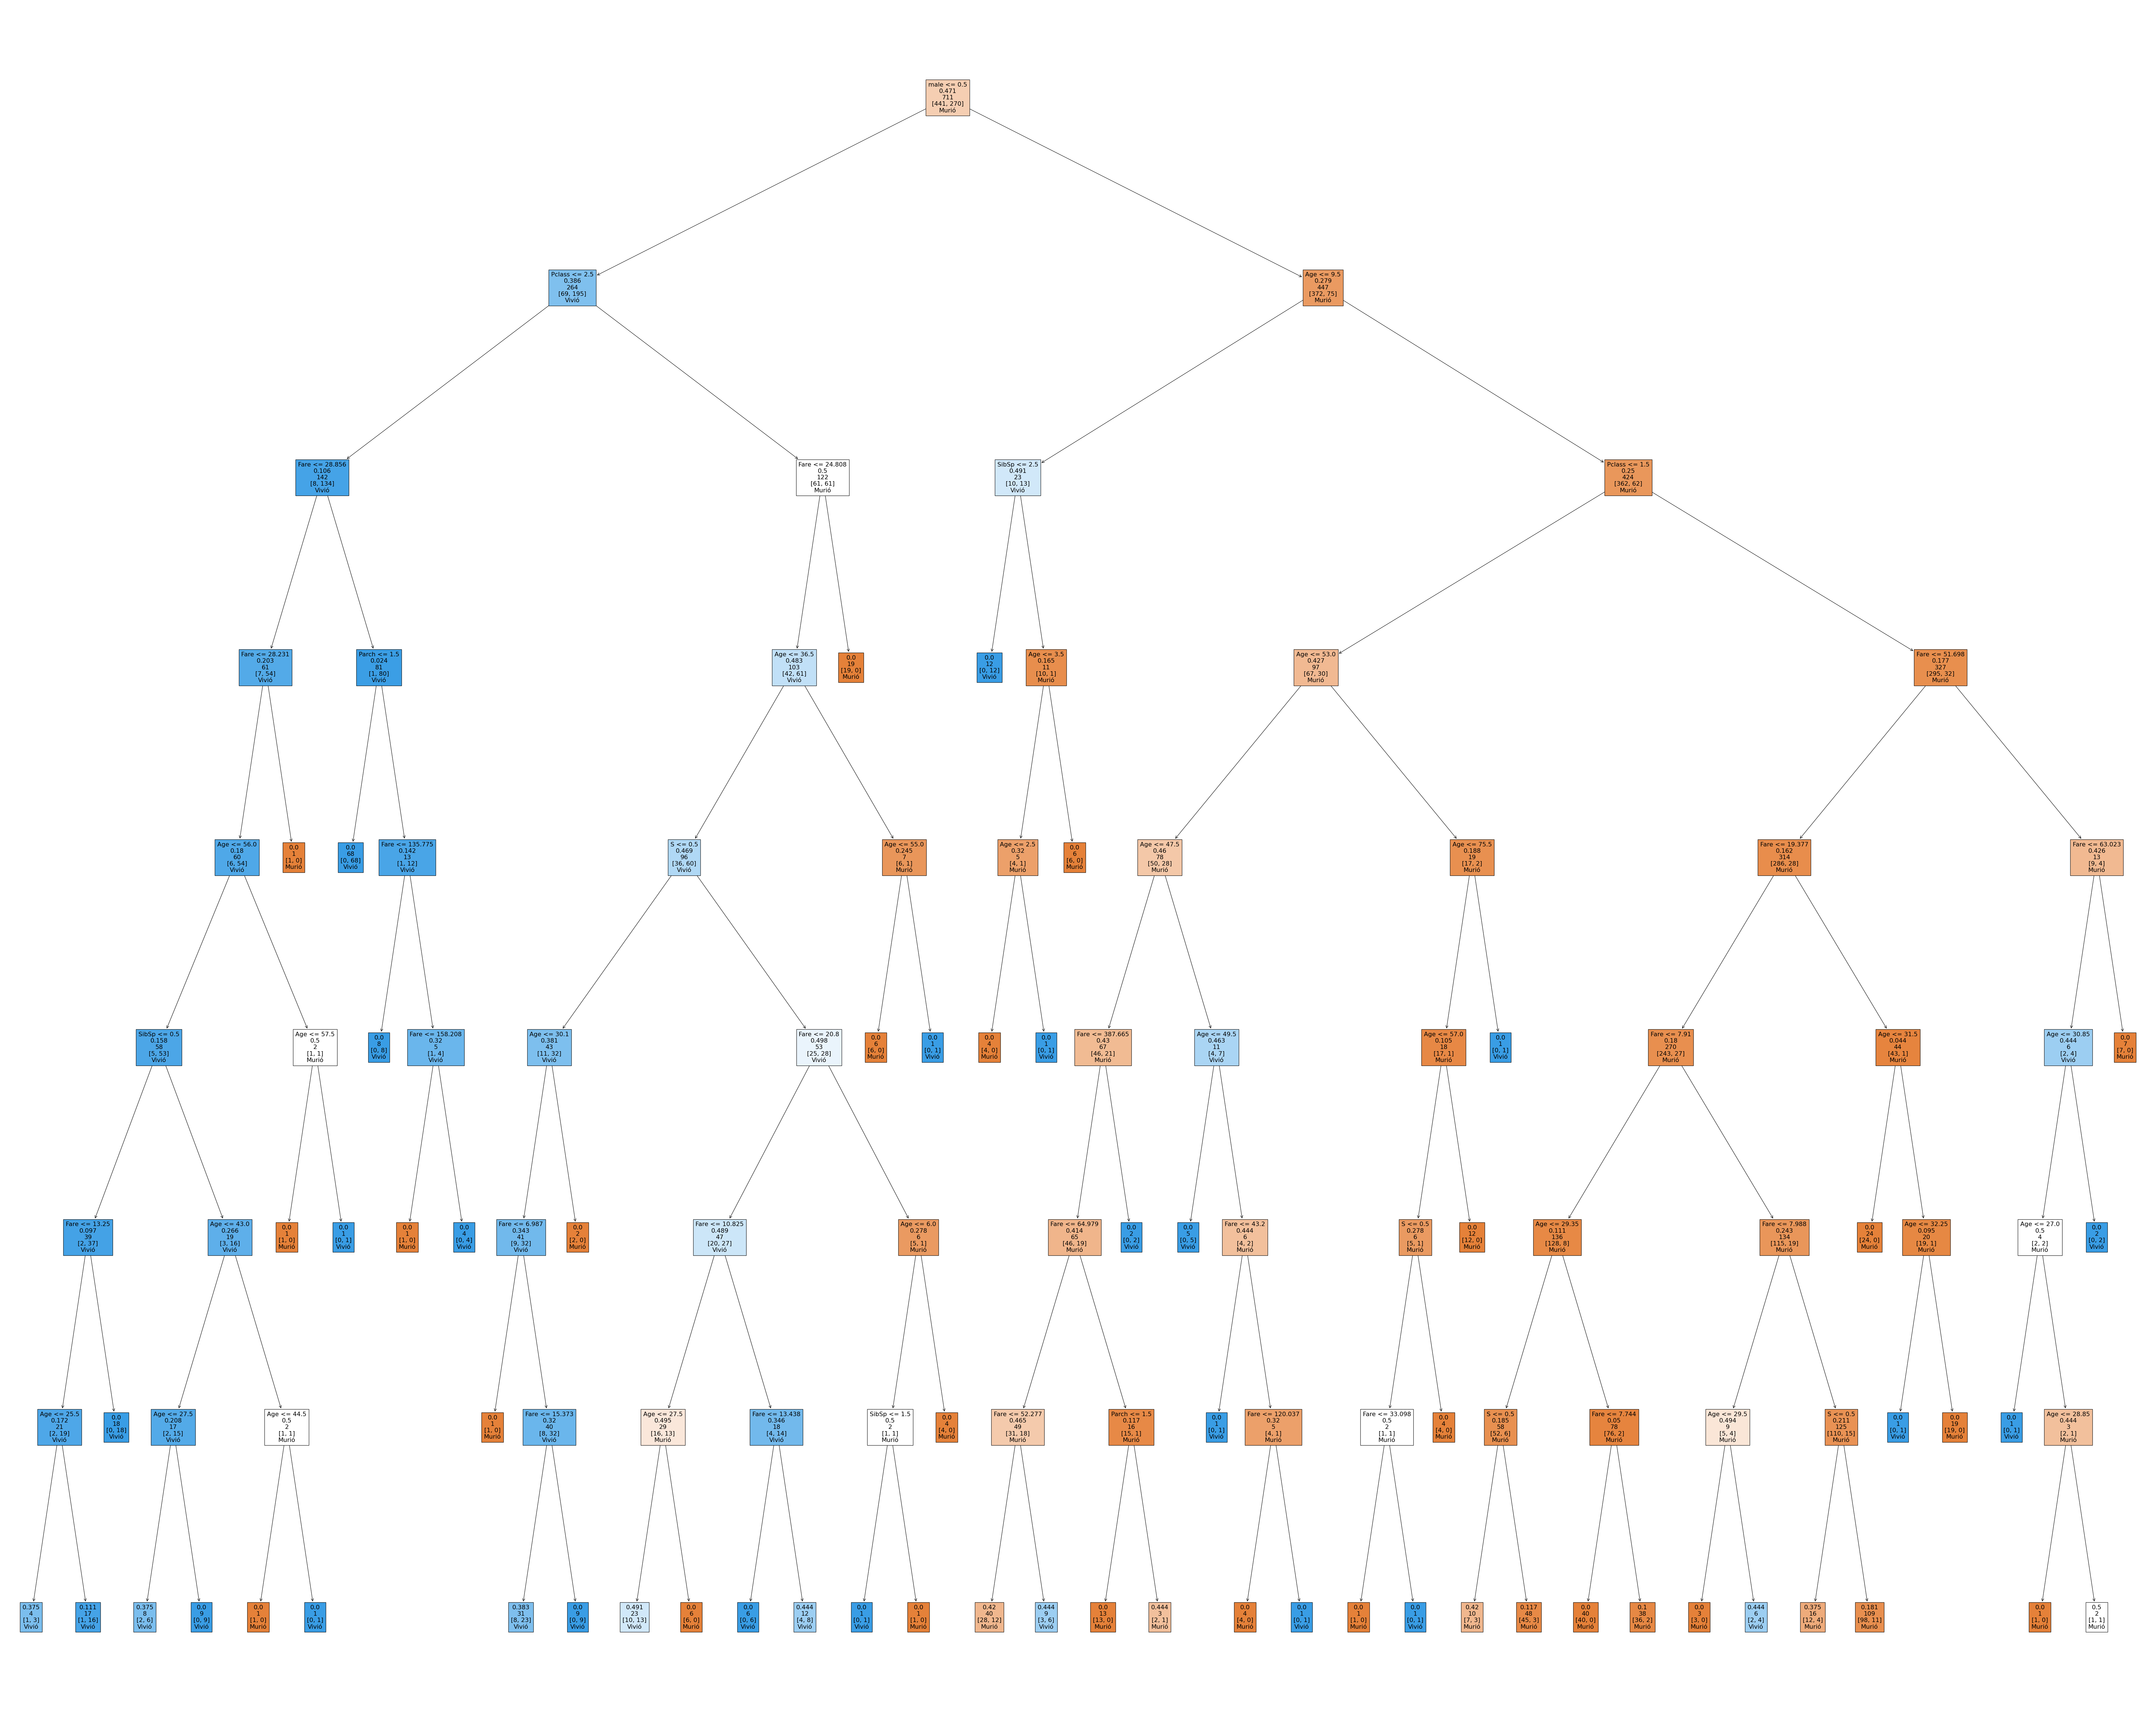

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7752808988764045

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       108
           1       0.80      0.57      0.67        70

    accuracy                           0.78       178
   macro avg       0.78      0.74      0.75       178
weighted avg       0.78      0.78      0.77       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[98, 10],
       [30, 40]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,98,10
Real: Si,30,40


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
num1 = int(input("Eres Hombre(1) o Mujer(0)?"))
num2 = int(input("Que edat tienes?"))
num3 = int(input("En que classe vas?"))
num4 = int(input("Cuanto te has gastado en el barco?"))

nueva_persona = [num3, num2, 0, 0, num4 ,num1, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print('Sobreviviste')
else:
  print("No sobreviviste")

KeyboardInterrupt: Interrupted by user